In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [115]:
df=pd.read_csv('exchange_rate.csv')
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [37]:
df.shape

(7588, 2)

In [38]:
df.isnull().sum()

date       0
Ex_rate    0
dtype: int64

In [39]:
df.duplicated().sum()

0

In [40]:
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


<AxesSubplot:>

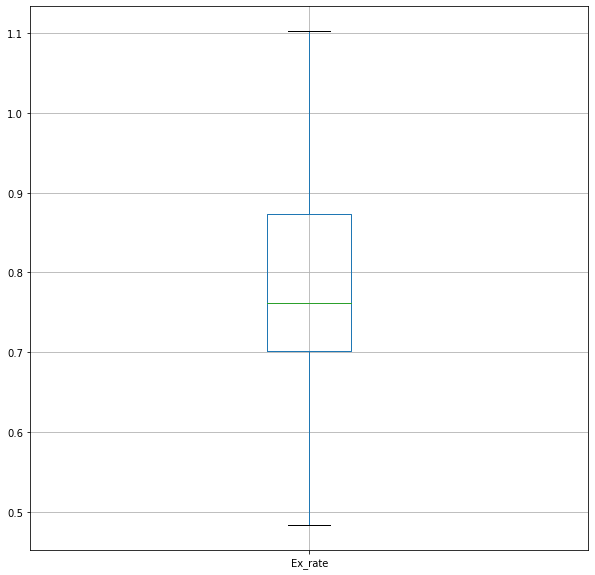

In [41]:
df.boxplot(figsize=(10,10))

In [42]:
df.skew()

C:\Users\Indranil Joshi\AppData\Local\Temp\ipykernel_10736\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Ex_rate    0.261127
dtype: float64

In [43]:
df.kurt()

C:\Users\Indranil Joshi\AppData\Local\Temp\ipykernel_10736\1257127604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


Ex_rate   -0.325539
dtype: float64

In [44]:
pd.Period('1990',freq='m')

Period('1990-01', 'M')

In [45]:
pd.Period('2010',freq='m')

Period('2010-01', 'M')

In [46]:
pd.Period('1990',freq='d')

Period('1990-01-01', 'D')

In [47]:
pd.Period('2009',freq='d')

Period('2009-01-01', 'D')

In [48]:
pd.Period('1991',freq='y')

Period('1991', 'A-DEC')

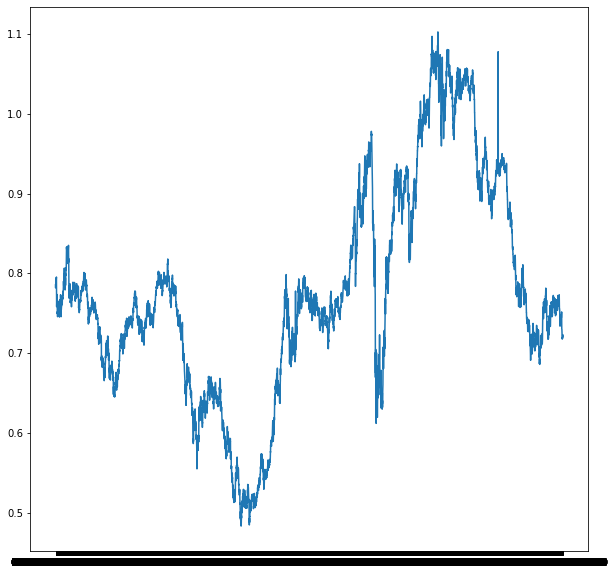

In [49]:
plt.figure(figsize=(10,10))
plt.plot(df['date'],df['Ex_rate'])

<AxesSubplot:xlabel='date'>

<Figure size 720x720 with 0 Axes>

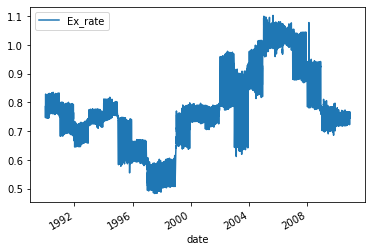

In [104]:
plt.figure(figsize=(10,10))
df.set_index('date',inplace=True)
df.index=pd.to_datetime(df.index)
df.plot()

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [54]:
model=seasonal_decompose(df['Ex_rate'] ,model='multiplicative', period=5)
model

<AxesSubplot:xlabel='date'>

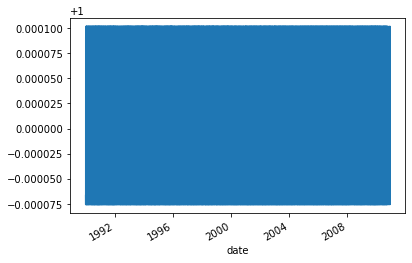

In [55]:
model.seasonal.plot()

<AxesSubplot:xlabel='date'>

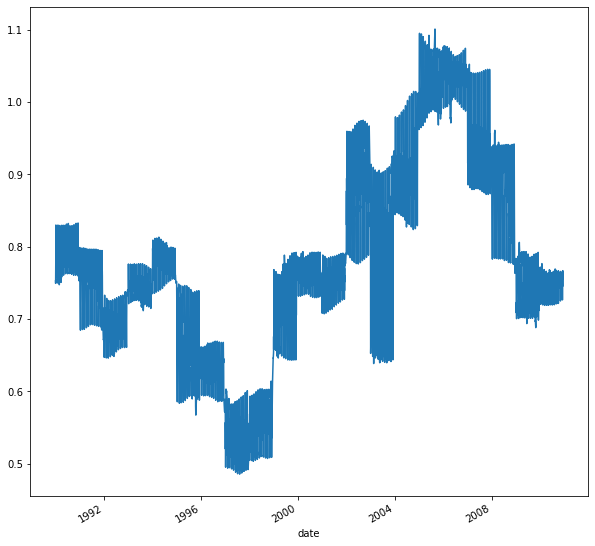

In [58]:
plt.figure(figsize=(10,10))
model.trend.plot()

<AxesSubplot:xlabel='date'>

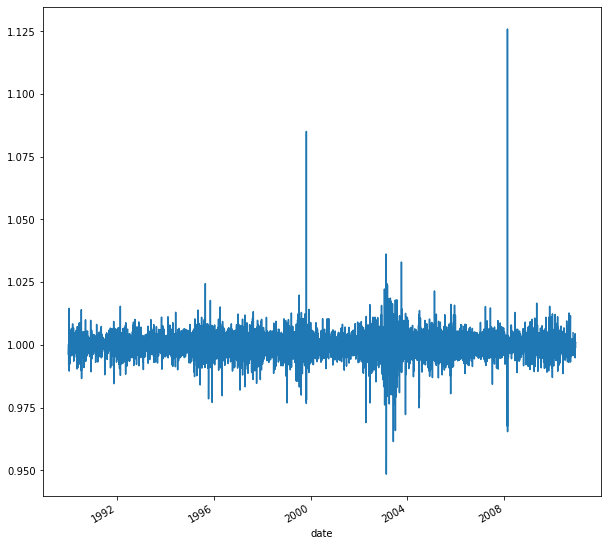

In [59]:
plt.figure(figsize=(10,10))
model.resid.plot()

In [61]:
ts_data=df['Ex_rate']

In [62]:
ts_data_log=np.log(ts_data)

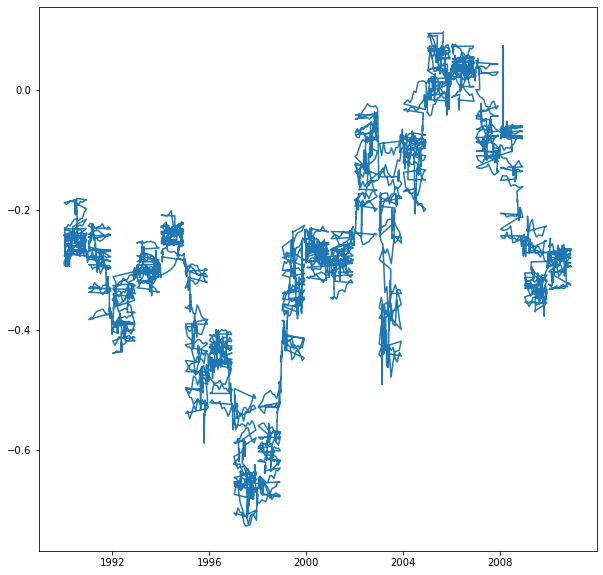

In [64]:
plt.figure(figsize=(10,10))
plt.plot(ts_data_log)

In [70]:
from statsmodels.tsa.stattools import adfuller,acf,pacf

In [75]:
def test_stationary(timeseries):
    rollmean=timeseries.rolling(window=12).mean()
    rollstd=timeseries.rolling(window=12).std()
    
    original=plt.plot(timeseries,color='blue',label='Original')
    mean=plt.plot(rollmean,color='red',label='Rolling Mean')
    std=plt.plot(rollstd,color='green',label='Rolling Standard')
    plt.legend(loc='best')
    
    print('Results of Dickey-Fuller Test: \n')
    df_test=adfuller(timeseries)
    my_output=pd.Series(df_test[0:4], index=['Test Static','p-value','#lags used', 'Numbers of Observations Used'])
    for i,j in df_test[4].items():
        my_output['critical value (%s)'%i]=j
    print(my_output)

Results of Dickey-Fuller Test: 

Test Static                       -1.664994
p-value                            0.449233
#lags used                         1.000000
Numbers of Observations Used    7586.000000
critical value (1%)               -3.431212
critical value (5%)               -2.861921
critical value (10%)              -2.566973
dtype: float64


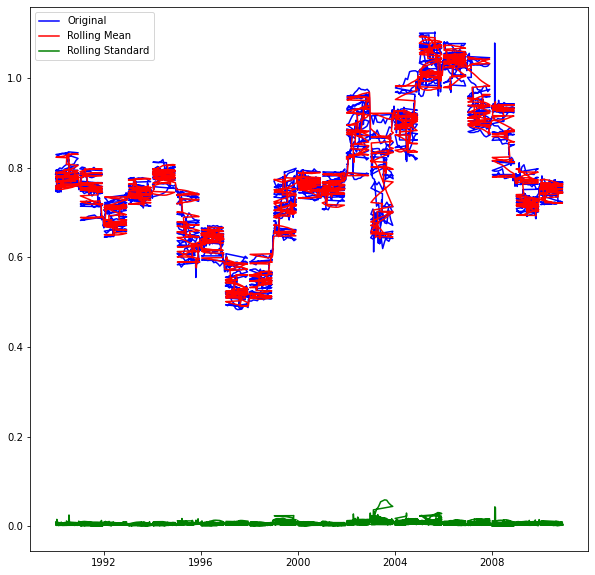

In [77]:
plt.figure(figsize=(10,10))
test_stationary(df['Ex_rate'])

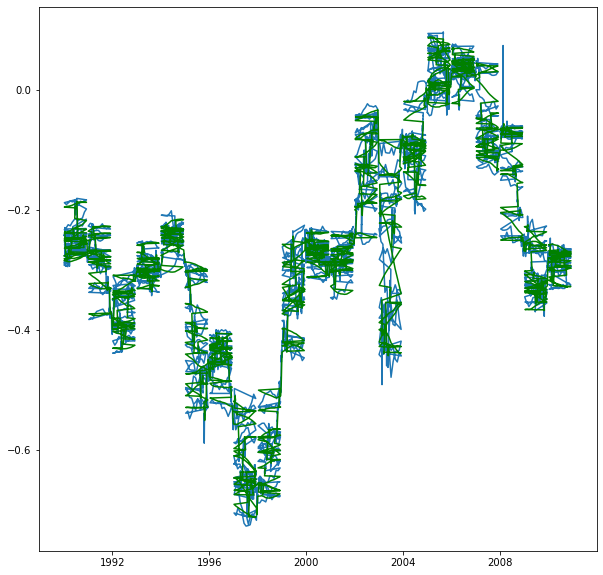

In [81]:
movingAverage=ts_data_log.rolling(window=12).mean()
movingSTD=ts_data_log.rolling(window=12).std()
plt.figure(figsize=(10,10))
plt.plot(ts_data_log)
plt.plot(movingAverage,color='green')

In [82]:
ts_data_log_diff=ts_data_log-movingAverage
ts_data_log_diff

date
1990-01-01         NaN
1990-02-01         NaN
1990-03-01         NaN
1990-04-01         NaN
1990-05-01         NaN
                ...   
2010-06-10   -0.005526
2010-07-10    0.000023
2010-08-10    0.002650
2010-09-10    0.000022
2010-10-10    0.000510
Name: Ex_rate, Length: 7588, dtype: float64

In [84]:
ts_data_log_diff.head(10)

date
1990-01-01   NaN
1990-02-01   NaN
1990-03-01   NaN
1990-04-01   NaN
1990-05-01   NaN
1990-06-01   NaN
1990-07-01   NaN
1990-08-01   NaN
1990-09-01   NaN
1990-10-01   NaN
Name: Ex_rate, dtype: float64

In [85]:
ts_data_log_diff.tail(10)

date
2010-01-10   -0.020363
2010-02-10   -0.014892
2010-03-10   -0.011423
2010-04-10   -0.006944
2010-05-10   -0.006627
2010-06-10   -0.005526
2010-07-10    0.000023
2010-08-10    0.002650
2010-09-10    0.000022
2010-10-10    0.000510
Name: Ex_rate, dtype: float64

In [86]:
ts_data_log_diff.shape

(7588,)

In [87]:
ts_data_log_diff.dropna(inplace=True)

In [88]:
ts_data_log_diff

date
1990-12-01    0.007278
1990-01-13    0.005678
1990-01-14    0.006632
1990-01-15   -0.017983
1990-01-16   -0.032204
                ...   
2010-06-10   -0.005526
2010-07-10    0.000023
2010-08-10    0.002650
2010-09-10    0.000022
2010-10-10    0.000510
Name: Ex_rate, Length: 7577, dtype: float64

In [89]:
ts_data_log_diff.shape

(7577,)

Results of Dickey-Fuller Test: 

Test Static                    -1.404275e+01
p-value                         3.281274e-26
#lags used                      2.900000e+01
Numbers of Observations Used    7.547000e+03
critical value (1%)            -3.431217e+00
critical value (5%)            -2.861923e+00
critical value (10%)           -2.566974e+00
dtype: float64


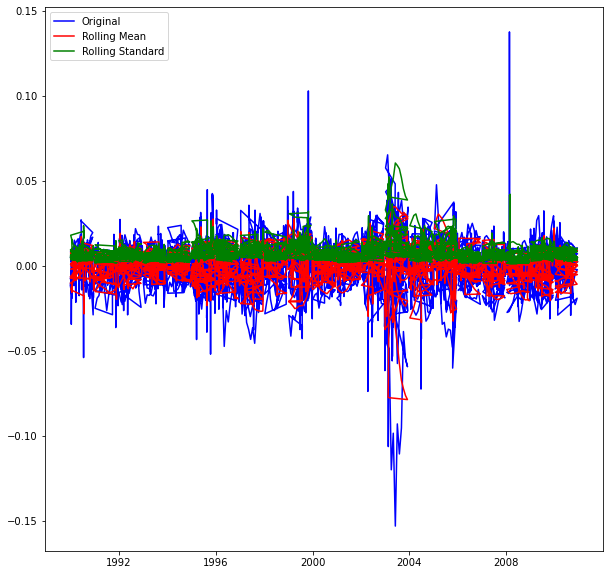

In [91]:
plt.figure(figsize=(10,10))
test_stationary(ts_data_log_diff)

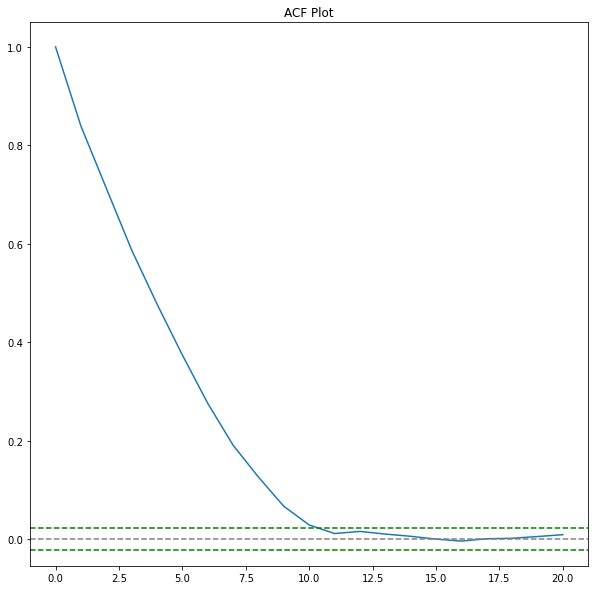

In [93]:
## Plotting ACF Curve:


plt.figure(figsize=(10,10))
plt.plot(np.arange(0,21), acf(ts_data_log_diff, nlags = 20))
plt.axhline(y=0, linestyle = '--', color = 'gray')
#Confidence intervals
plt.axhline(y=-1.96/np.sqrt(len(ts_data_log_diff)), linestyle = '--', color = 'green')
plt.axhline(y=1.96/np.sqrt(len(ts_data_log_diff)), linestyle = '--', color = 'green')
plt.title('ACF Plot')
plt.show()

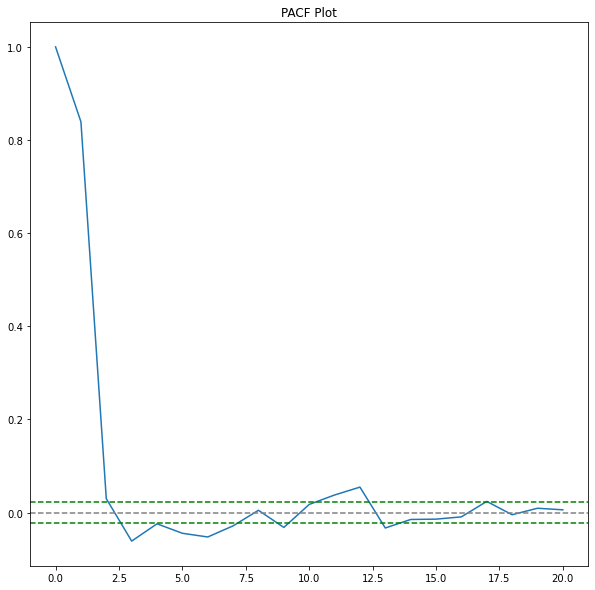

In [94]:
##Plotting PACF Curve:



plt.figure(figsize=(10,10))
plt.plot(np.arange(0,21), pacf(ts_data_log_diff, nlags = 20))
plt.axhline(y=0, linestyle = '--', color = 'gray')
#Confidence intervals
plt.axhline(y=-1.96/np.sqrt(len(ts_data_log_diff)), linestyle = '--', color = 'green')
plt.axhline(y=1.96/np.sqrt(len(ts_data_log_diff)), linestyle = '--', color = 'green')
plt.title('PACF Plot')
plt.show()

In [105]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [107]:
model=ARIMA(df['Ex_rate'], order=(1,1,1))

C:\Users\Indranil Joshi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Indranil Joshi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Indranil Joshi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Indranil Joshi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq

In [108]:
result=model.fit()

In [120]:
result.predict()

date
1990-01-01    0.000000
1990-02-01    0.785500
1990-03-01    0.782286
1990-04-01    0.786058
1990-05-01    0.786089
                ...   
2010-06-10    0.718837
2010-07-10    0.718522
2010-08-10    0.721400
2010-09-10    0.723017
2010-10-10    0.721136
Name: predicted_mean, Length: 7588, dtype: float64

In [124]:
result.forecast(steps=25)

C:\Users\Indranil Joshi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


7588    0.720826
7589    0.720826
7590    0.720826
7591    0.720826
7592    0.720826
7593    0.720826
7594    0.720826
7595    0.720826
7596    0.720826
7597    0.720826
7598    0.720826
7599    0.720826
7600    0.720826
7601    0.720826
7602    0.720826
7603    0.720826
7604    0.720826
7605    0.720826
7606    0.720826
7607    0.720826
7608    0.720826
7609    0.720826
7610    0.720826
7611    0.720826
7612    0.720826
Name: predicted_mean, dtype: float64

In [126]:
result.fittedvalues

date
1990-01-01    0.000000
1990-02-01    0.785500
1990-03-01    0.782286
1990-04-01    0.786058
1990-05-01    0.786089
                ...   
2010-06-10    0.718837
2010-07-10    0.718522
2010-08-10    0.721400
2010-09-10    0.723017
2010-10-10    0.721136
Length: 7588, dtype: float64

C:\Users\Indranil Joshi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Indranil Joshi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<AxesSubplot:>

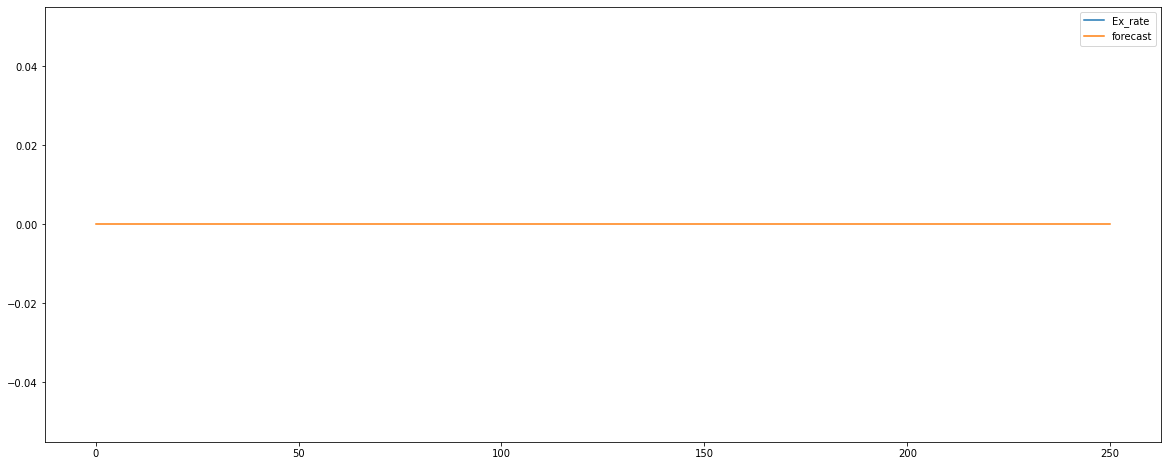

In [129]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
Model= SARIMAX(df['Ex_rate'],order=(1,1,1),seasonal_order=(1,1,1,12))
results1=Model.fit()
df['forecast']= results1.predict(start=0,end=250)
df[['Ex_rate','forecast']].plot(figsize=(20,8))

In [133]:
from pandas.tseries.offsets import DateOffset
ts = pd.Timestamp('10-10-2010 00:00')
ts+DateOffset(month=6)

Timestamp('2010-06-10 00:00:00')